## Урок 3. Разведочный анализ данных в R

График имеет наибольшую ценность
тогда, когда он вынуждает нас заметить
то, что мы совсем не ожидали увидеть.

Джон Тьюки

R уже в себе имеет мощный инструментарий для визуализации
1. Гистограммы - hist()
2. Скаттерплот - plot()
3. Боксплоты - boxplot()
4. Квантиль-квантиль плот - qqnorm(), qqline()

In [ ]:
library("dplyr")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library(httr)
# Скачаем файл "cardio_train.csv"
filename <- "cardio_train.csv"
url <- "https://drive.google.com/uc?authuser=0&id=1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP&export=download"
GET(url, write_disk(filename, overwrite=TRUE))

Response [https://doc-0g-ao-docs.googleusercontent.com/docs/securesc/jgmuk6sacecsqts3ijcghj5904rnircl/8751tqf4qnsjm4nvl88u1etbp2brrbl9/1684779225000/16531863302665455688/16563457641317502301Z/1qPKIRO3GfGNQK7rUFpZQWQRaNhTjHvJP?e=download&uuid=a860baa5-0518-4c59-bc4a-c9eb3af7c712&nonce=2tnhjfueualgg&user=16563457641317502301Z&hash=8mqp6qhktokpspckvum670truh5lmvor]
  Date: 2023-05-22 18:14
  Status: 200
  Content-Type: text/csv
  Size: 2.94 MB
<ON DISK>  /content/cardio_train.csvNULL

In [ ]:
df = read.csv(filename, sep=";")

In [ ]:
head(df, 3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1


In [ ]:
dim(df)

[1] 70000    14

In [ ]:
df <- df %>% mutate(age_years=trunc(age/365))

In [ ]:
head(df, 3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51


Мы знаем, что СВ, которые описывают биологические процесссы, часто являются непрерывными и
следуют нормальному распределению (вес, рост, давление, скорость)

Будем исследовать 2 переменные из реального набора с kaggle.com нижние и верхнее артериальное
давление пациентов

Мы можем получить быстрое представление о этих переменных, построив для каждой из них
гистограмму с помощью функции hist()

Чтобы понять, с какими данными мы имеем дело, возьмем такие характеристики из
описательной статистики, как среднее арифметическое и среднее квадратичное
отклонение

In [ ]:
cat(mean(df$ap_hi), mean(df$ap_lo))

128.8173 96.63041

In [ ]:
cat(sd(df$ap_hi), sd(df$ap_lo))

154.0114 188.4725

In [ ]:
install.packages("rafalib")
library(rafalib)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



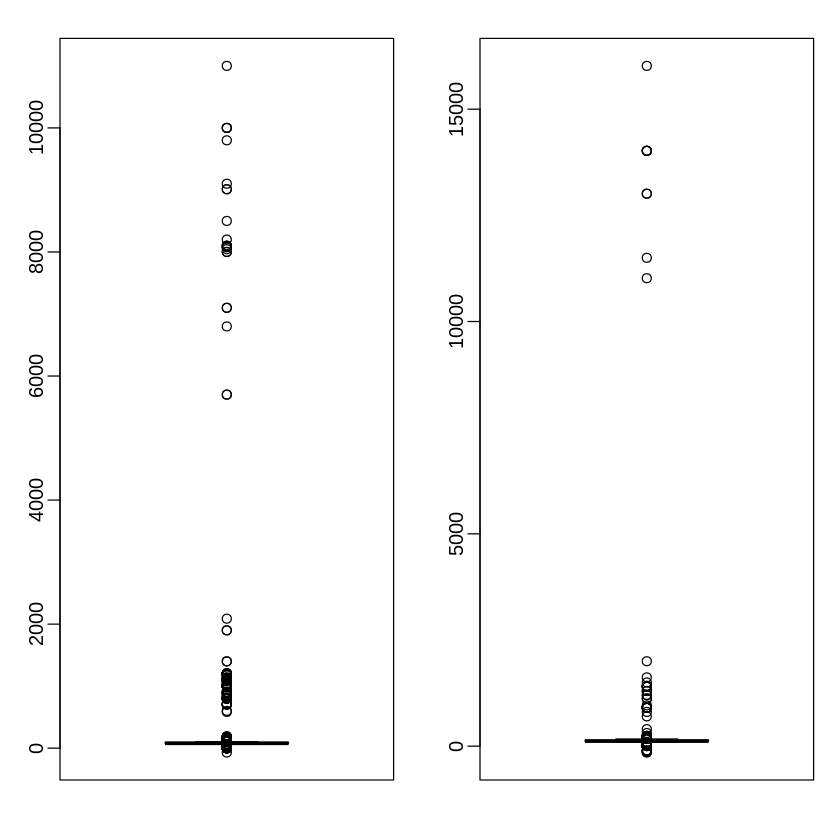

In [ ]:
mypar(1,2)
box_lo <- boxplot(df$ap_lo)
box_hi <- boxplot(df$ap_hi)

## Что делать с выбросами?

* выбросы могут сорвать дальнейший анализ
* выбросы могут отображать нестабильность процесса
* выбросы могут быть ошибкой ввода

Давление, опасное для жизни

Верхние границы: 200/140

Нижние границы: 70/50

In [ ]:
ap_lo_capt <- "Нижнее давление"
ap_hi_capt <- "Верхнее давление"

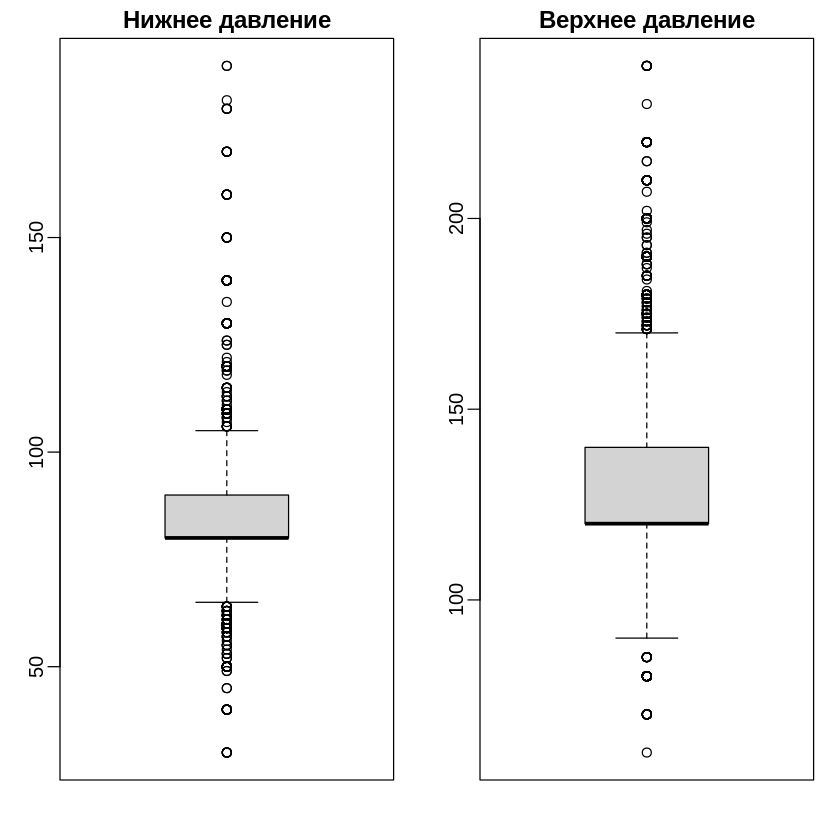

In [ ]:
# Построим боксплоты без учета выбросов, которые скорее всего были ошибкой ввода
mypar(1, 2)
box_lo <- boxplot(df$ap_lo[df$ap_lo<200 & df$ap_lo>20])
title(ap_lo_capt)
box_hi <- boxplot(df$ap_hi[df$ap_hi<300 & df$ap_hi>40])
title(ap_hi_capt)

In [ ]:
median(df$ap_lo)

[1] 80

In [ ]:
quantile(df$ap_lo, 0.25)

25% 
 80

In [ ]:
sort(df$ap_lo)[17501:35000]

[1] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [25] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [49] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [73] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
   [97] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [121] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [145] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [169] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [193] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [217] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [241] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [265] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [289] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [313] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [337] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [361] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [385] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [409] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [433] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [457] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [481] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [505] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [529] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [553] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [577] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [601] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [625] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [649] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [673] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [697] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [721] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [745] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [769] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [793] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [817] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [841] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [865] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [889] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [913] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [937] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [961] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  [985] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1009] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1033] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1057] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1081] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1105] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1129] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1153] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [1177] 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 [12

Воспользуемся функцией filter(), %>% из пакета dplyr, чтобы подготовить датасет без
грубейших ошибок ввода. Присвоим новому набору имя tidy_set с помощью <-

In [ ]:
tidy_set <- df %>% filter((ap_lo<200 & ap_lo>20) & (ap_hi<300 & ap_hi>40))
head(tidy_set, 3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,50
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,55
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,51


## Сравним размер прежнего набора с размером нового набора с обработанными данными

Посмотрим значения среднего арифметического и sd для двух переменных ap_lo и ap_hi

In [ ]:
dim(tidy_set)

[1] 68781    14

In [ ]:
cat(mean(tidy_set$ap_hi), mean(tidy_set$ap_lo))

126.6153 81.37756

In [ ]:
cat(sd(tidy_set$ap_hi), sd(tidy_set$ap_lo))

16.76354 9.688359

После того, как мы проанализировали данные с помощью боксплота, давайте еще раз взглянем на
гистограммы для двух величин.

Визуализация данных с помощью боксплота дала
нам возможность увидеть все значения переменной
и определить грубейшие выбросы (аутлайеры).
Теперь по гистограмме видно, что распределения
стали больше

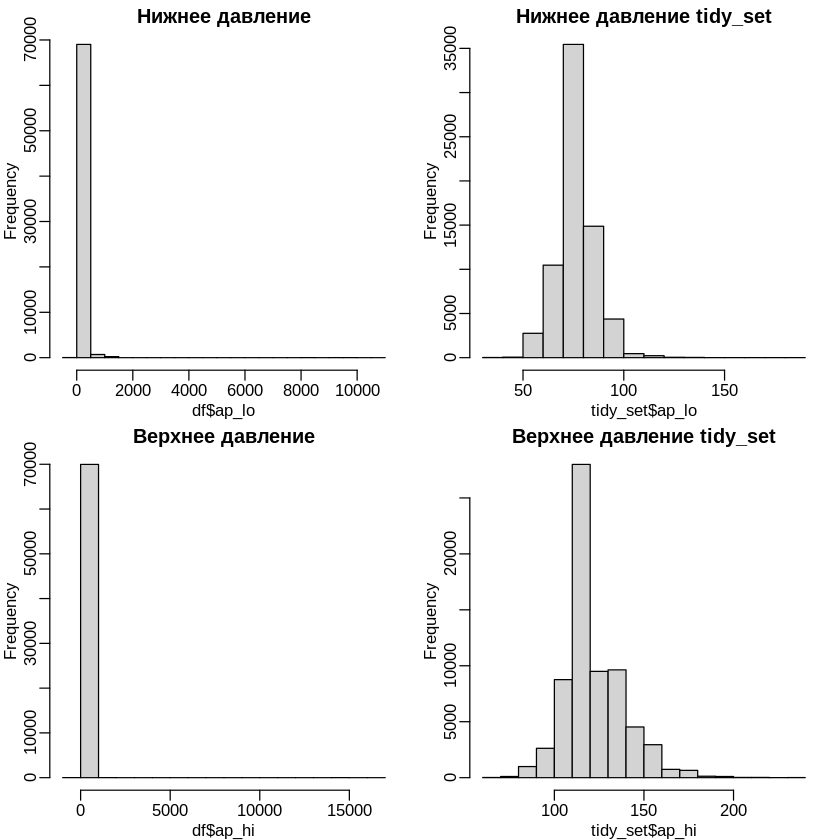

In [ ]:
mypar(2, 2)
hist(df$ap_lo, main=ap_lo_capt)
hist(tidy_set$ap_lo, main=paste(ap_lo_capt, "tidy_set"))
hist(df$ap_hi, main=ap_hi_capt)
hist(tidy_set$ap_hi, main=paste(ap_hi_capt, "tidy_set"))

## Одним из самых распространенных методов проверки нормальности является QQ график

В основе лежит идея сравнить теоретические квантили с квантилями СВ

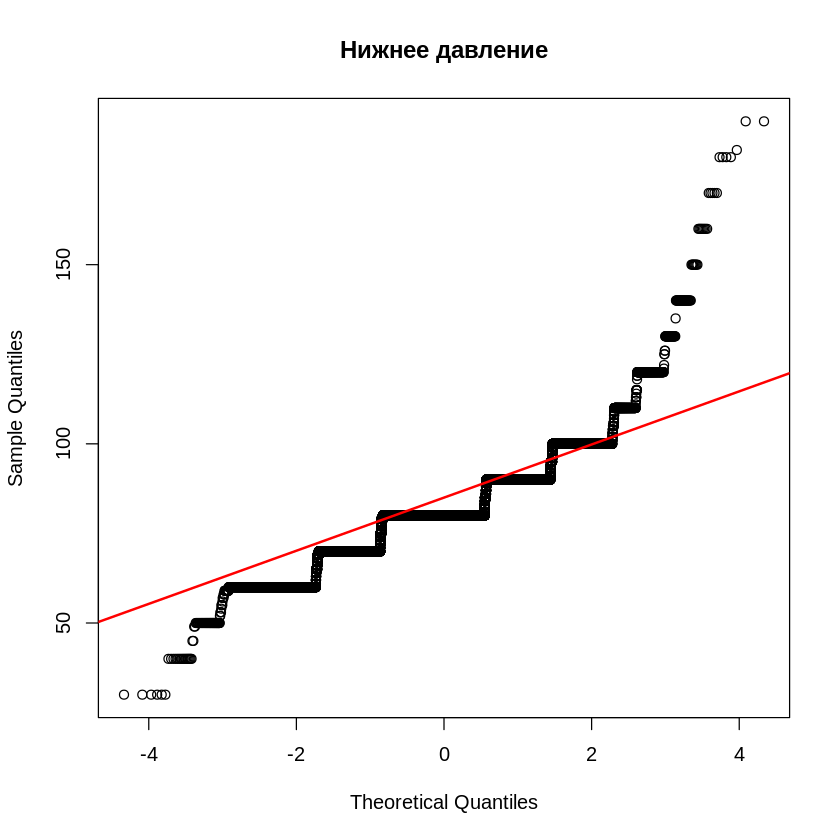

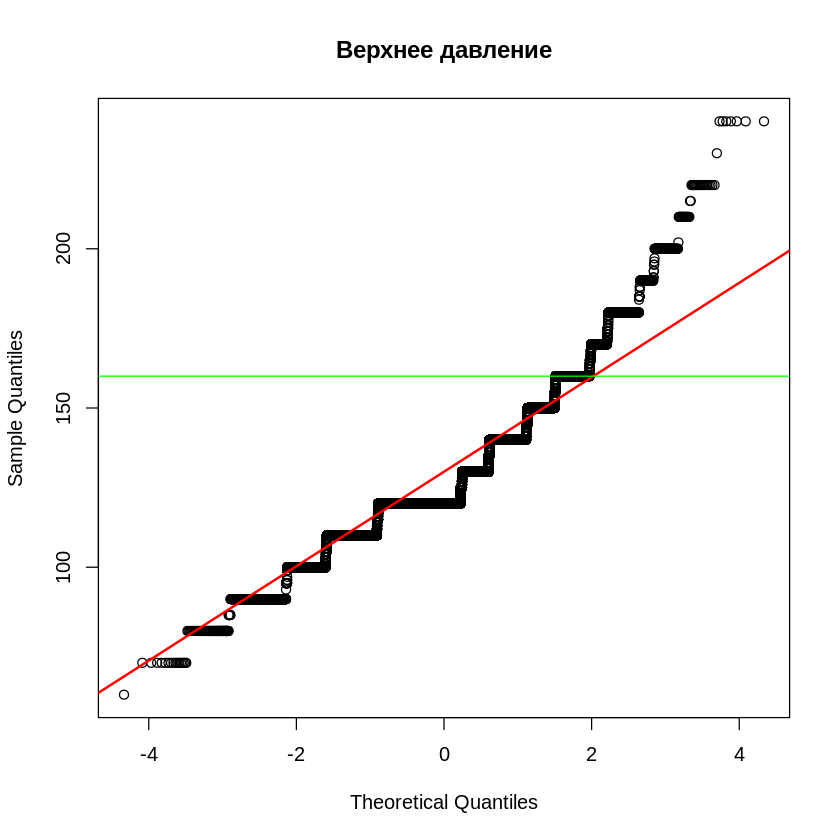

In [ ]:
qqnorm(tidy_set$ap_lo, main=ap_lo_capt)
qqline(tidy_set$ap_lo, col="red", lwd=2)
qqnorm(tidy_set$ap_hi, main=ap_hi_capt)
qqline(tidy_set$ap_hi, col="red", lwd=2)
abline(h=160, col="green")

По графикам видно, что верхние значения нижнего артериального давления лежат выше, чем предполагалось нормальным распределением, а нижние - ниже

Для верхнего артериального давления верхние значения лежат слишком высоко

Если мы хотим сравнить давление у мужчин и женщин, удобно построить боксплоты для каждой подгруппы, используя функцию split()

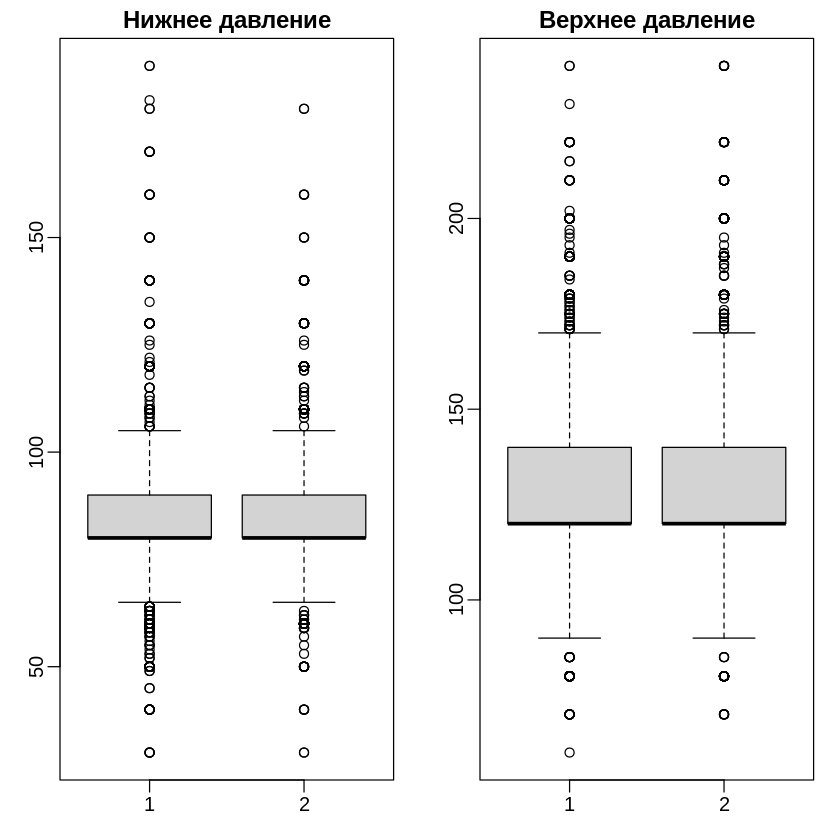

In [ ]:
mypar(1,2)
groupss_lo <- split(tidy_set$ap_lo, tidy_set$gender)
boxplot(groupss_lo)
title(ap_lo_capt)
groupss_hi <- split(tidy_set$ap_hi, tidy_set$gender)
boxplot(groupss_hi)
title(ap_hi_capt)

Вывод: мы видим распределение в каждой
подгруппе и для мужчин и женщин они
схожи. Можем предположить,что давление
от пола не зависит

## Вернемся к исследованию СВ без учета пола пациента

Построим график плотности распределения для нижнего и верхнего артериального давления
использую функцию density() и plot()

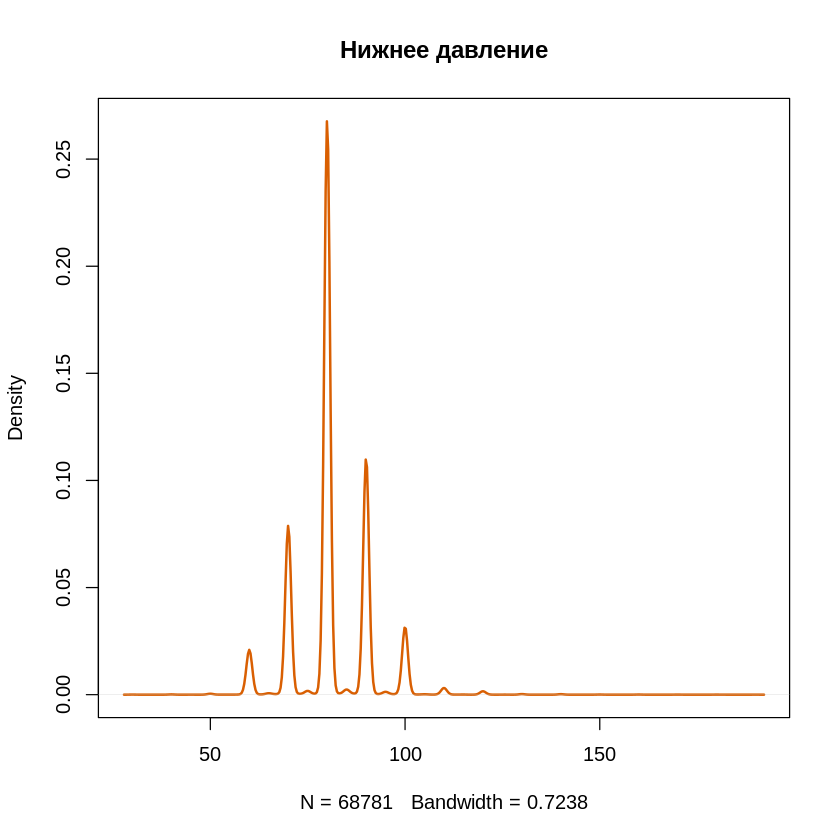

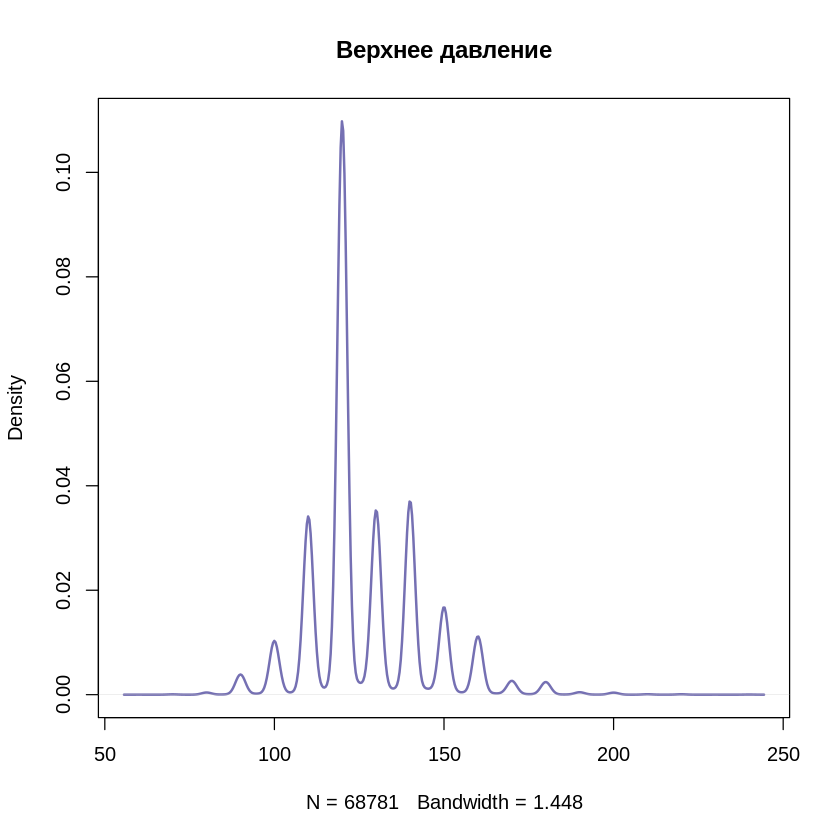

In [ ]:
plot(density(tidy_set$ap_lo), col=2, lwd=2, main=ap_lo_capt)
plot(density(tidy_set$ap_hi), col=3, lwd=2, main=ap_hi_capt)

Мы ожидали увидеть нормальное распределение с одним пиком.

## График показал нам то, что мы не ожидали увидеть

Разберемся в причине этих множественных пиков

[1] 66 66 66 66 66 66 66 66 66 66 66 66 67 67 67 67 67 67 67 67 67 67 67 67
   [25] 67 67 67 67 67 67 67 68 68 68 68 68 68 68 68 68 68 68 68 68 69 69 69 69
   [49] 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
   [73] 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
   [97] 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
  [121] 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
  [145] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [169] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [193] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [217] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [241] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [265] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [289] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [313] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [337] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [361] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [385] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [409] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [433] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [457] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [481] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [505] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [529] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [553] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [577] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [601] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [625] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [649] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [673] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [697] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [721] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [745] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [769] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [793] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [817] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [841] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [865] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [889] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [913] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [937] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [961] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
  [985] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1009] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1033] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1057] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1081] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1105] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1129] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1153] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [1177] 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 [12

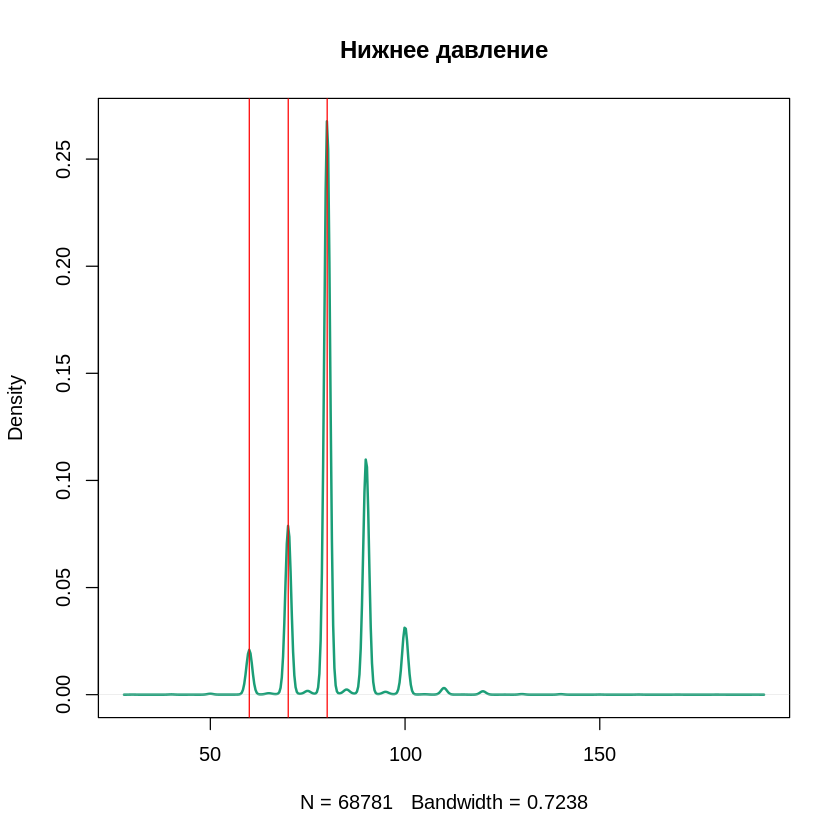

In [ ]:
plot(density(tidy_set$ap_lo), col=1, lwd=2, main=ap_lo_capt)
abline(v=70, col="red")
abline(v=60, col="red")
abline(v=80, col="red")
sort_lo <- sort(tidy_set$ap_lo)
cut_1 <- sort_lo[sort_lo>65 & sort_lo<75]
cut_1

Вывод: пики образуются за счет округления показателей давления или
отсутствия электронных приборов, которые дают большую точность измерения,
чем механические

Приблизительно так должно выглядеть истинное
нормальное распределение давления. Чтобы это изобразить, используем аргумент adjust

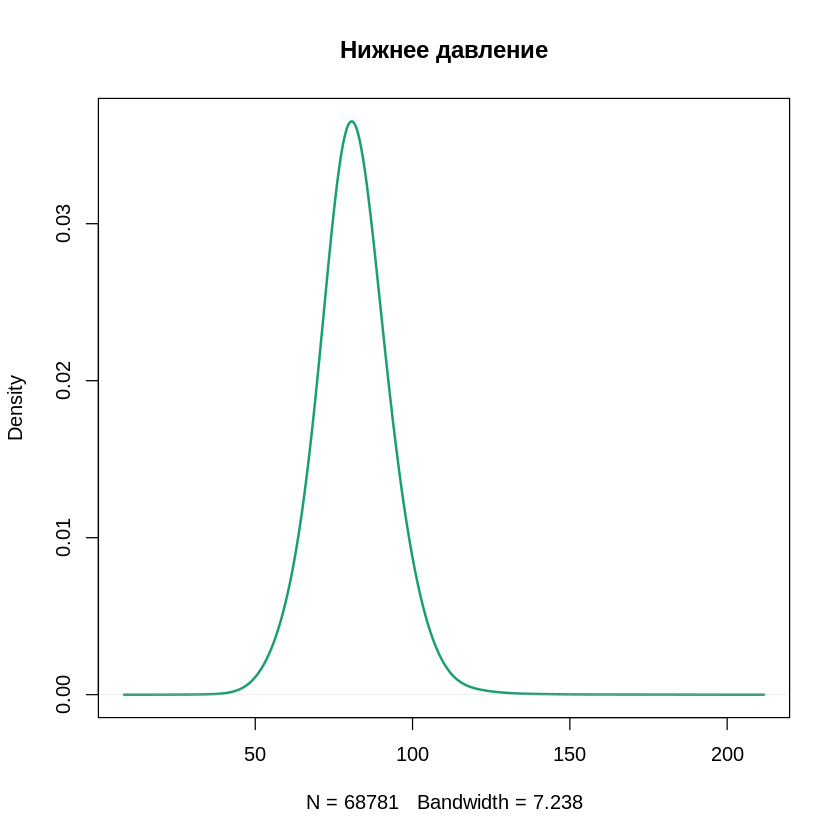

In [ ]:
plot(density(tidy_set$ap_lo, adjust=10), col=1, lwd=2, main=ap_lo_capt)

Чтобы произвести наглядное сравнение двух случайных величин, удобно их нанести на
один график. Они будут иметь единый общий масштаб и шкалы

## Сравним распределение нижнего и верхнего артериального давления

С помощью функции legend() обозначим, каким СВ соответствуют графики

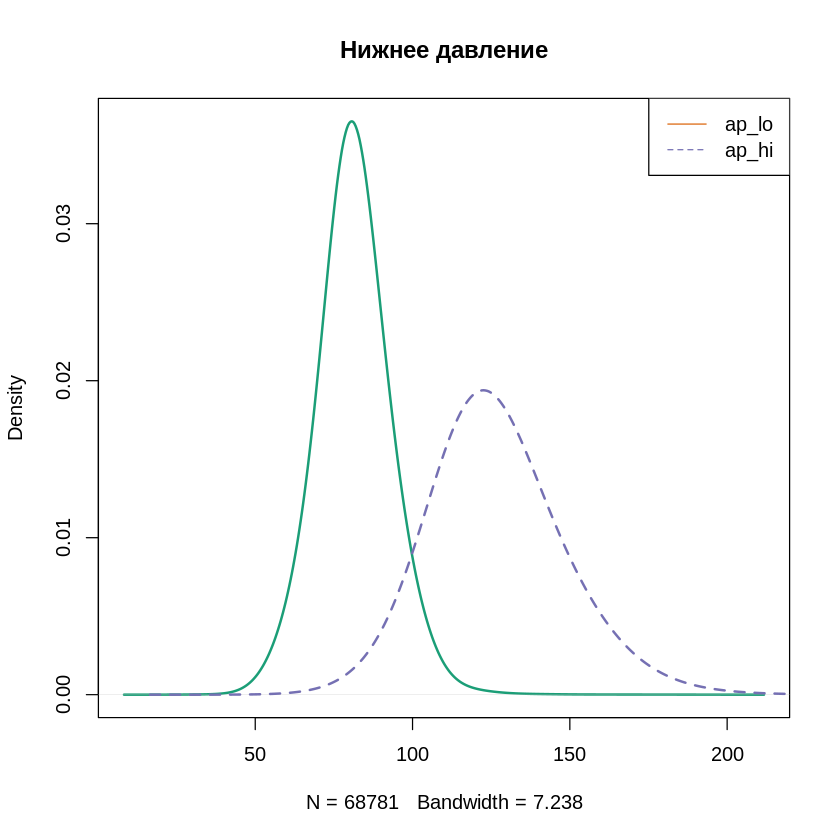

In [ ]:
plot(density(tidy_set$ap_lo, adjust=10), col=1, lwd=2, main=ap_lo_capt)
lines(density(tidy_set$ap_hi, adjust=10), col=3, lwd=2, lty=2)
legend("topright", c("ap_lo", "ap_hi"), col=c(2, 3), lty=c(1, 2))

## Скаттерплот

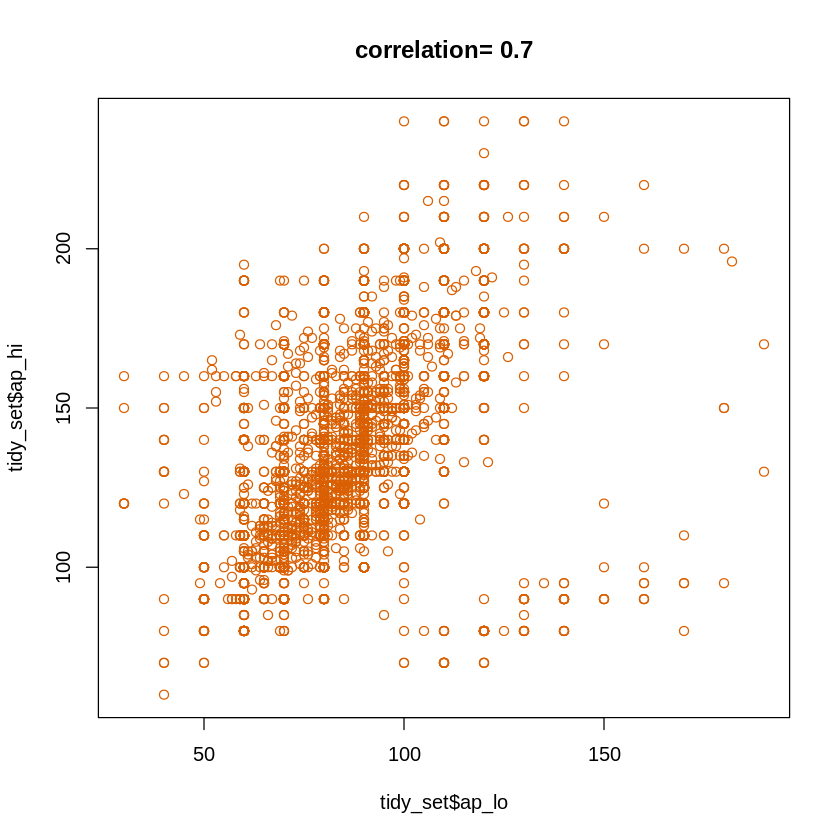

In [ ]:
plot(
    tidy_set$ap_lo,
    tidy_set$ap_hi,
    col=2,
    main=paste(
        "correlation=",
        signif(cor(tidy_set$ap_lo, tidy_set$ap_hi), 2)
    )
)

На предыдущих графиках мы видим
средние значения, медианы, дисперсии, но
не можем проследить взаимосвязь двух
величин

Скаттерплот позволяет нам это увидеть. Скаттерплот также позволяет проследить, есть ли разделение на группы по каким-либо
признакам

По данному графику можно проследить
тренд: с ростом нижнего артериального
давления растет и нижнее артериальное
давление

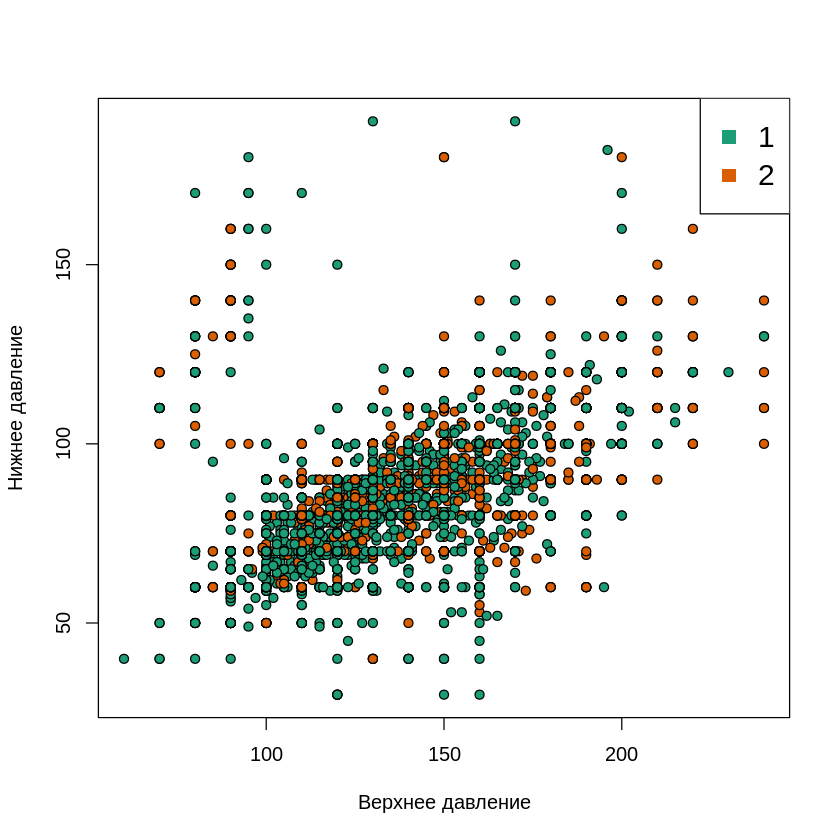

In [ ]:
plot(
    tidy_set$ap_hi,
    tidy_set$ap_lo,
    pch=21,
    bg=as.numeric(factor(tidy_set$gender)),
    xlab=ap_hi_capt,
    ylab=ap_lo_capt
)
legend(
    "topright",
    levels(factor(tidy_set$gender)),
    col=seq(along=levels(factor(tidy_set$gender))),
    pch=15,
    cex=1.5
)

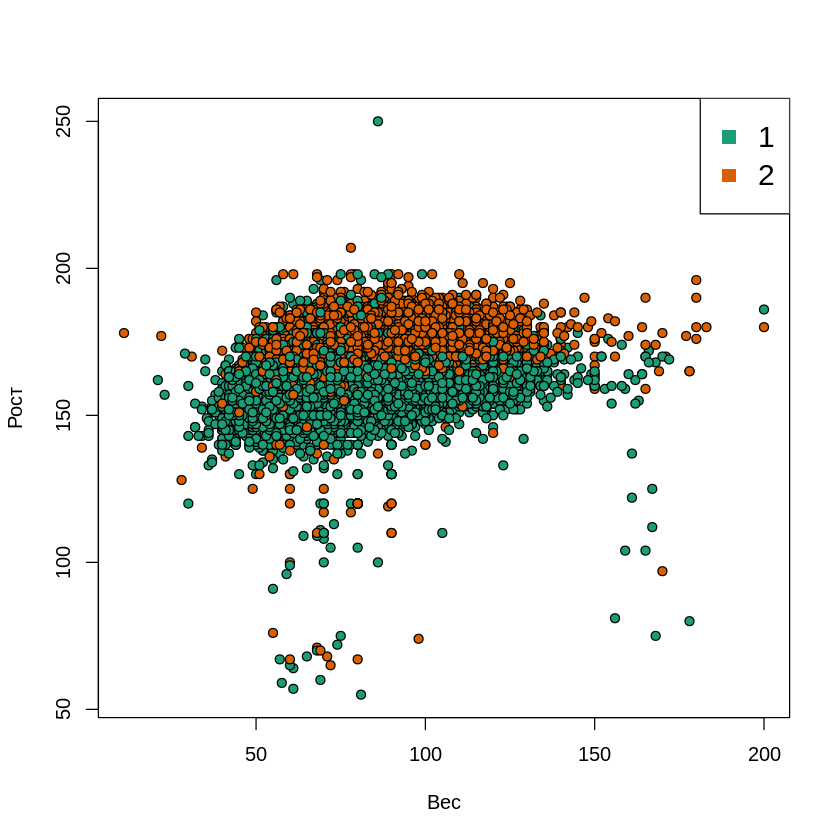

In [ ]:
plot(
    tidy_set$weight,
    tidy_set$height,
    pch=21,
    bg=as.numeric(factor(tidy_set$gender)),
    xlab="Вес",
    ylab="Рост"
)
legend(
    "topright",
    levels(factor(tidy_set$gender)),
    col=seq(along=levels(factor(tidy_set$gender))),
    pch=15,
    cex=1.5
)

Вывод: показатели артериального давления не смогут объяснить половую
принадлежность пациента, в то время, как рост и вес хорошо разделены по полу

## Скаттерплот также можно построить и для датафрейма

Это позволит определить, какие признаки несут больше всего информации

In [ ]:
mini_set <- tidy_set[,3:5]
head(mini_set)

,gender,height,weight
,<int>,<int>,<dbl>
1,2,168,62
2,1,156,85
3,1,165,64
4,2,169,82
5,1,156,56
6,1,151,67


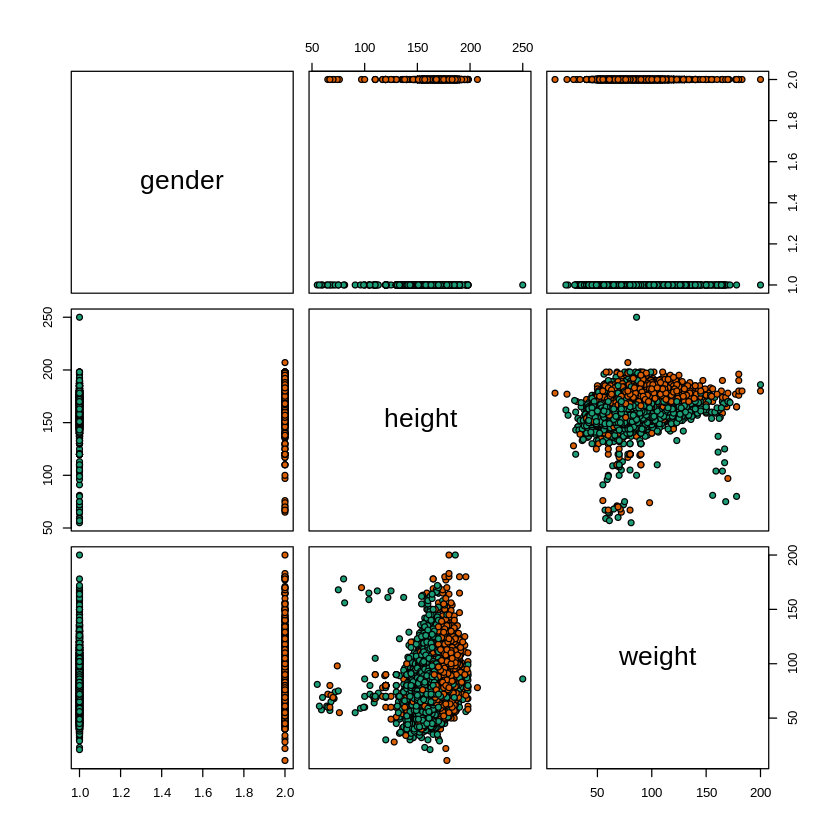

In [ ]:
plot(mini_set, pch=21, bg=mini_set$gender)

In [ ]:
mini_set_1 <- tidy_set[,c(3,6,7)]
head(mini_set_1)

,gender,ap_hi,ap_lo
,<int>,<int>,<int>
1,2,110,80
2,1,140,90
3,1,130,70
4,2,150,100
5,1,100,60
6,1,120,80


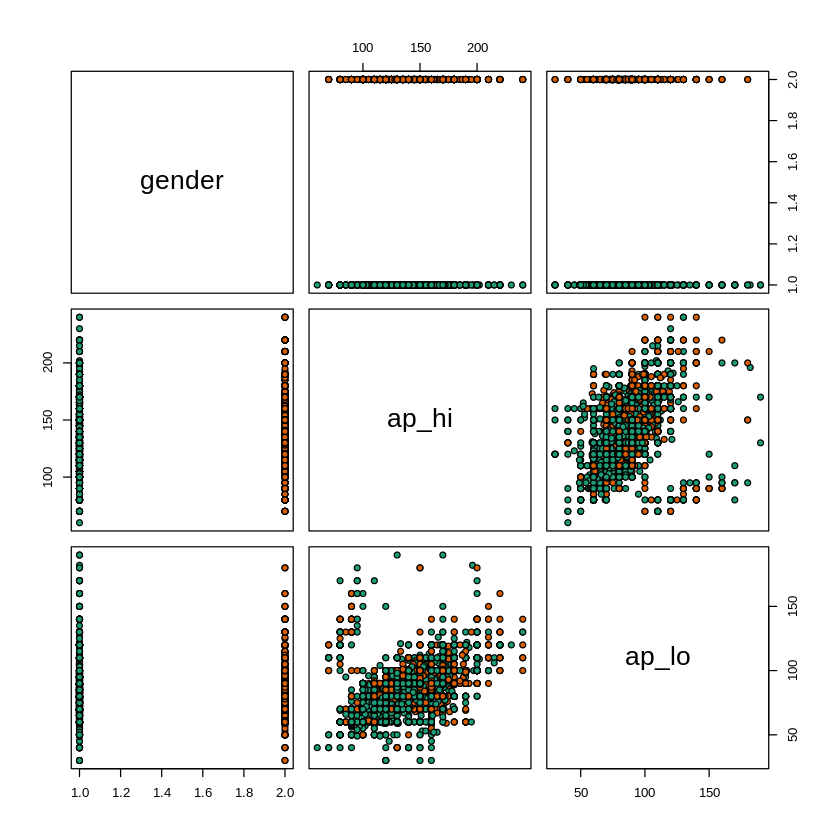

In [ ]:
plot(mini_set_1, pch=21, bg=mini_set_1$gender)

В конечном итоге графический анализ должен быть
информативен и понятен целевой аудитории

## Приобретенные навыки:

1. Научились делать визуализацию данных:
    * гистограмма,
    * боксплот,
    * скаттер-плот,
    * график плотности распределения,
    * QQ-график

2. Научились считывать информацию, представленную в графическом виде